<a href="https://colab.research.google.com/github/nikhiltejarudraram/Nikhil_INFO5731_SPRING2025/blob/main/Rudraram_Nikhil_Teja_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
pip install scikit-learn gensim nltk matplotlib


In [ ]:
!pip uninstall numpy pandas matplotlib scikit-learn gensim -y
!pip install numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.6.3 gensim==4.3.1 --force-reinstall


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


LDA Coherence Score (K=10): 0.5805
LSA Coherence Score (K=10): 0.4847
LDA K=2, Coherence=0.4921
LDA K=3, Coherence=0.4320
LDA K=4, Coherence=0.5079
LDA K=5, Coherence=0.5219
LDA K=6, Coherence=0.6177
LDA K=7, Coherence=0.4524
LDA K=8, Coherence=0.5470
LDA K=9, Coherence=0.5708
LDA K=10, Coherence=0.5805
LDA K=11, Coherence=0.6199
LDA K=12, Coherence=0.5694
LDA K=13, Coherence=0.5858
LDA K=14, Coherence=0.5740
LDA K=15, Coherence=0.6099


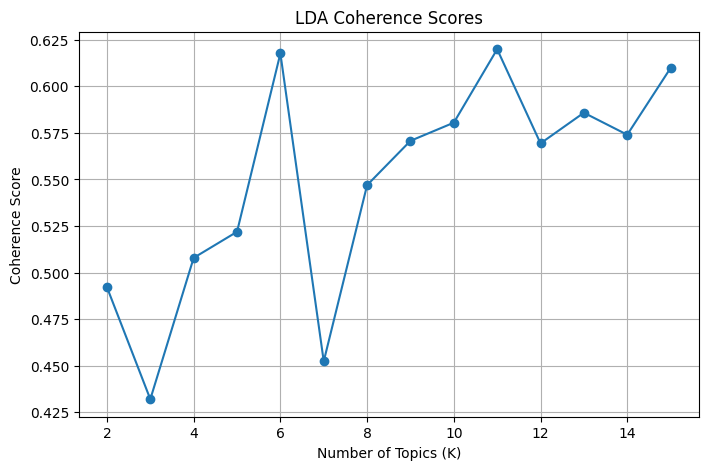

LSA K=2, Coherence=0.5863
LSA K=3, Coherence=0.5610
LSA K=4, Coherence=0.6187
LSA K=5, Coherence=0.5810
LSA K=6, Coherence=0.5795
LSA K=7, Coherence=0.5761
LSA K=8, Coherence=0.5240
LSA K=9, Coherence=0.5325
LSA K=10, Coherence=0.4847
LSA K=11, Coherence=0.4849
LSA K=12, Coherence=0.4810
LSA K=13, Coherence=0.4638
LSA K=14, Coherence=0.4518
LSA K=15, Coherence=0.4446


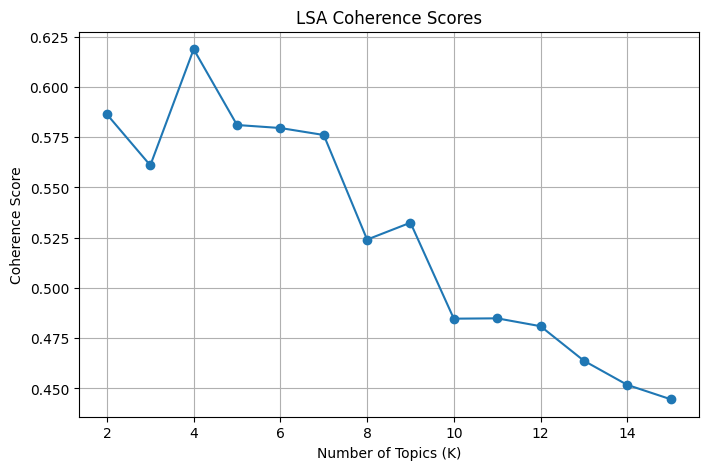


LDA Topics:
Topic 1: stephanopoulos, think, president, know, general, well, time, attorney, question, people
Topic 2: peace, springfield, john, rochester, also, widget, jesus, providence, utica, baltimore
Topic 3: would, people, think, time, like, know, right, could, even, believe
Topic 4: armenian, people, would, turkish, killed, genocide, year, time, village, russian
Topic 5: drive, scsi, system, jumper, using, card, monitor, problem, work, need
Topic 6: game, year, team, player, last, good, would, play, think, like
Topic 7: like, would, problem, window, work, thing, know, much, well, appears
Topic 8: file, output, program, entry, line, oname, char, printf, stream, name
Topic 9: graphic, file, cancer, information, mail, image, center, available, format, please
Topic 10: software, program, encryption, system, window, access, space, data, driver, vote

LSA Topics:
Topic 1: would, know, like, people, think, time, anyone, window, good, could
Topic 2: drive, window, thanks, driver, file,

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim.corpora import Dictionary
from gensim.models import CoherenceModel

import gensim
import warnings
warnings.filterwarnings("ignore")

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load and sample 2000 documents
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
docs = random.sample(newsgroups.data, 2000)

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(doc):
    tokens = gensim.utils.simple_preprocess(doc, deacc=True)
    return [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 3]

processed_docs = [preprocess(doc) for doc in docs]

# Prepare corpus for gensim
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(text) for text in processed_docs]

# Vectorize for sklearn models
count_vectorizer = CountVectorizer(analyzer=lambda x: x)
X_count = count_vectorizer.fit_transform(processed_docs)

tfidf_vectorizer = TfidfVectorizer(analyzer=lambda x: x)
X_tfidf = tfidf_vectorizer.fit_transform(processed_docs)

# Function to extract top words
def get_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    topics = []
    for topic_weights in model.components_:
        top_words = [words[i] for i in topic_weights.argsort()[-top_n:][::-1]]
        topics.append(top_words)
    return topics

# Run LDA and LSA with K=10
K = 10
lda = LatentDirichletAllocation(n_components=K, random_state=42)
lda.fit(X_count)
lda_topics = get_topics(lda, count_vectorizer)

lsa = TruncatedSVD(n_components=K, random_state=42)
lsa.fit(X_tfidf)
lsa_topics = get_topics(lsa, tfidf_vectorizer)

# Calculate coherence
lda_coherence = CoherenceModel(topics=lda_topics, texts=processed_docs, dictionary=dictionary, coherence='c_v').get_coherence()
lsa_coherence = CoherenceModel(topics=lsa_topics, texts=processed_docs, dictionary=dictionary, coherence='c_v').get_coherence()

print(f"LDA Coherence Score (K=10): {lda_coherence:.4f}")
print(f"LSA Coherence Score (K=10): {lsa_coherence:.4f}")

# Coherence optimization
def optimize_k(start=2, limit=15, step=1, model_type='lda'):
    coherence_values = []
    k_values = range(start, limit + 1, step)
    for k in k_values:
        if model_type == 'lda':
            model = LatentDirichletAllocation(n_components=k, random_state=42)
            model.fit(X_count)
            topics = get_topics(model, count_vectorizer)
        else:
            model = TruncatedSVD(n_components=k, random_state=42)
            model.fit(X_tfidf)
            topics = get_topics(model, tfidf_vectorizer)
        coherence = CoherenceModel(topics=topics, texts=processed_docs, dictionary=dictionary, coherence='c_v').get_coherence()
        coherence_values.append(coherence)
        print(f"{model_type.upper()} K={k}, Coherence={coherence:.4f}")
    return k_values, coherence_values

# Plot coherence scores
def plot_coherence(k_vals, scores, title):
    plt.figure(figsize=(8,5))
    plt.plot(k_vals, scores, marker='o')
    plt.xlabel("Number of Topics (K)")
    plt.ylabel("Coherence Score")
    plt.title(title)
    plt.grid(True)
    plt.show()

# Optimize and plot
lda_k, lda_scores = optimize_k(model_type='lda')
plot_coherence(lda_k, lda_scores, "LDA Coherence Scores")

lsa_k, lsa_scores = optimize_k(model_type='lsa')
plot_coherence(lsa_k, lsa_scores, "LSA Coherence Scores")

# Print LDA and LSA Topics
def print_topics(name, topics):
    print(f"\n{name} Topics:")
    for i, topic in enumerate(topics):
        print(f"Topic {i+1}: {', '.join(topic)}")

print_topics("LDA", lda_topics)
print_topics("LSA", lsa_topics)


# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [ ]:
!pip install bertopic[visualization] gensim scikit-learn


2025-04-07 20:59:56,141 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/35 [00:00<?, ?it/s]

2025-04-07 20:59:58,772 - BERTopic - Embedding - Completed ✓
2025-04-07 20:59:58,774 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-07 21:00:02,427 - BERTopic - Dimensionality - Completed ✓
2025-04-07 21:00:02,428 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-07 21:00:02,471 - BERTopic - Cluster - Completed ✓
2025-04-07 21:00:02,472 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-07 21:00:02,512 - BERTopic - Representation - Completed ✓
2025-04-07 21:00:02,513 - BERTopic - Topic reduction - Reducing number of topics
2025-04-07 21:00:02,521 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-07 21:00:02,545 - BERTopic - Representation - Completed ✓
2025-04-07 21:00:02,547 - BERTopic - Topic reduction - Reduced number of topics from 18 to 10



Top 10 Topics:
Topic 0: and, for, with, is, of, the, in, we, on, to
Topic 1: quantum, computing, in, of, it, for, on, is, with, and
Topic 2: ethics, the, on, is, it, with, for, we, of, in
Topic 3: chatgpt, of, we, to, in, the, is, it, intelligence, artificial
Topic 4: nlp, on, for, is, with, the, it, to, robotics, we
Topic 5: to, of, on, with, is, and, in, it, for, we
Topic 6: gpt, on, it, learning, and, we, in, is, future, of
Topic 7: vision, it, and, is, of, in, for, on, with, we
Topic 8: you, 100daysofcode, python, me, linux, datascience, account, snapchat, programming, coding



 Fitting model for K=5
 Coherence Score for K=5: 0.6002

 Fitting model for K=6
 Coherence Score for K=6: 0.5607

 Fitting model for K=7
 Coherence Score for K=7: 0.5511

 Fitting model for K=8
 Coherence Score for K=8: 0.5254

 Fitting model for K=9
 Coherence Score for K=9: 0.5142

 Fitting model for K=10
 Coherence Score for K=10: 0.4958

 Fitting model for K=11
 Coherence Score for K=11: 0.4828

 Fitting model for K=12
 Coherence Score for K=12: 0.4749

 Fitting model for K=13
 Coherence Score for K=13: 0.4718

 Fitting model for K=14
 Coherence Score for K=14: 0.4715

 Fitting model for K=15
 Coherence Score for K=15: 0.4690


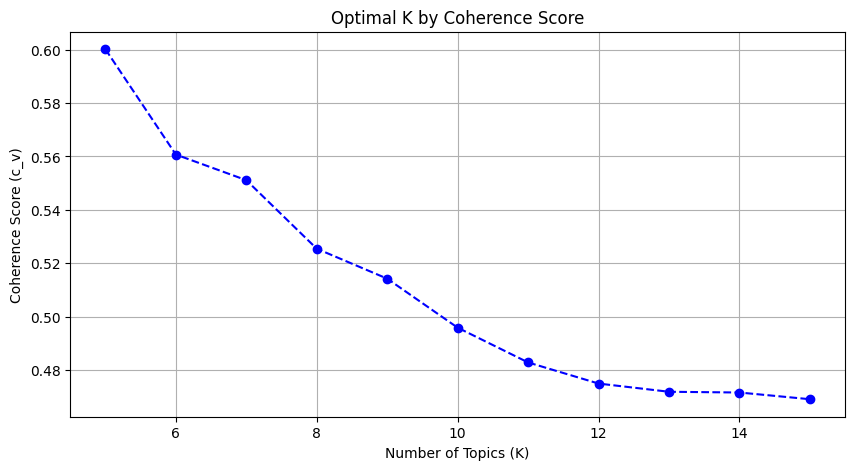


 Best number of topics based on coherence score: K = 5


In [ ]:
# Step 1: Import Libraries
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Step 2: Load Dataset
df = pd.read_csv("/content/Assignment 3 twitter.csv")  # Modify path if needed
texts = df['Tweet Text'].dropna().astype(str).tolist()

# Step 3: Fit BERTopic with K=10
topic_model = BERTopic(top_n_words=10, nr_topics=10, verbose=True)
topics, _ = topic_model.fit_transform(texts)

# Step 4: Print and Save Topic Interpretations
print("\nTop 10 Topics:")
topic_keywords = []
for topic_num in range(10):
    topic_words = topic_model.get_topic(topic_num)
    if topic_words:
        keywords = [word for word, _ in topic_words]
        print(f"Topic {topic_num}: {', '.join(keywords)}")
        topic_keywords.append({'Topic': topic_num, 'Keywords': ", ".join(keywords)})

# Optional: Export topics to CSV
pd.DataFrame(topic_keywords).to_csv("BERTopic_10_topics.csv", index=False)

# Step 5: Visualizations
topic_model.visualize_topics().show()
topic_model.visualize_barchart(top_n_topics=10).show()
topic_model.visualize_hierarchy().show()

# Step 6: Define Coherence Score Function
def compute_coherence(topics, texts):
    tokenized_texts = [text.lower().split() for text in texts]
    dictionary = Dictionary(tokenized_texts)
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]
    cm = CoherenceModel(topics=topics, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    return cm.get_coherence()

# Step 7: Find Optimal K with Coherence
k_values = list(range(5, 16))
coherence_scores = []

for k in k_values:
    print(f"\n Fitting model for K={k}")
    model_k = BERTopic(top_n_words=10, nr_topics=k)
    topics_k, _ = model_k.fit_transform(texts)
    topic_words = [model_k.get_topic(i) for i in range(k)]
    topic_words_clean = [[word for word, _ in topic] for topic in topic_words if topic]
    score = compute_coherence(topic_words_clean, texts)
    coherence_scores.append(score)
    print(f" Coherence Score for K={k}: {score:.4f}")

# Step 8: Plot Coherence Scores
plt.figure(figsize=(10,5))
plt.plot(k_values, coherence_scores, marker='o', color='blue', linestyle='--')
plt.title("Optimal K by Coherence Score")
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score (c_v)")
plt.grid(True)
plt.show()

# Step 9: Output Optimal K
optimal_k = k_values[coherence_scores.index(max(coherence_scores))]
print(f"\n Best number of topics based on coherence score: K = {optimal_k}")


# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

Clean the text data by removing stopwords, lemmatizing, and tokenizing

In [ ]:
pip install bertopic openai scikit-learn nltk gensim


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade gensim


In [ ]:
import nltk

# Force re-download of all necessary NLTK resources
nltk.download("punkt", force=True)
nltk.download("stopwords", force=True)
nltk.download("wordnet", force=True)
nltk.download("omw-1.4", force=True)  # For lemmatizer to work properly


In [ ]:
import shutil
shutil.rmtree("/root/nltk_data", ignore_errors=True)


In [ ]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")  # For lemmatization


In [ ]:
import nltk
nltk.download("punkt", download_dir="/usr/local/share/nltk_data")
nltk.download("stopwords", download_dir="/usr/local/share/nltk_data")
nltk.download("wordnet", download_dir="/usr/local/share/nltk_data")
nltk.download("omw-1.4", download_dir="/usr/local/share/nltk_data")

# Tell NLTK where to find data
nltk.data.path.append("/usr/local/share/nltk_data")


In [ ]:
import random
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups


import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


import gensim
import warnings
warnings.filterwarnings("ignore")

# Load and sample 2000 documents
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
docs = random.sample(newsgroups.data, 2000)

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(doc):
    tokens = gensim.utils.simple_preprocess(doc, deacc=True)
    return [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 3]

processed_docs = [preprocess(doc) for doc in docs]

In [ ]:
! pip install openai

In [ ]:
import openai
from bertopic.representation import OpenAI

from google.colab import userdata
api_key = userdata.get('OPENAI_API_KEY')



client = openai.OpenAI(api_key=api_key)

prompt = """
I have the following documents:
[DOCUMENTS]

These documents are about the following topic from: "20 newsgroup dataset ".
Your job is to analyze the text, understand the context, and provide a brief summary of the common themes or insights across the documents.
"""
representation_model = OpenAI(client,prompt=prompt, model="gpt-4o-mini", delay_in_seconds=5)

LLM_topic_model = BERTopic(representation_model=representation_model)

OPENAI_new_topics, OPENAI_ = LLM_topic_model.fit_transform(docs)

In [ ]:
import pandas as pd

# Create a DataFrame for better visualization
LLM_topic_df = pd.DataFrame({'Tweet': docs, 'Topic': OPENAI_new_topics})

# Count the number of tweets per topic
LLM_topic_counts = LLM_topic_df['Topic'].value_counts()

print(LLM_topic_counts)

Topic
-1     416
 0     234
 1     192
 2     161
 3     139
 4      98
 5      94
 6      70
 7      64
 8      56
 9      49
 10     44
 11     44
 12     34
 13     29
 14     29
 15     29
 16     28
 17     24
 18     21
 19     21
 20     18
 21     17
 22     15
 23     14
 24     13
 25     13
 26     12
 27     11
 28     11
Name: count, dtype: int64


In [ ]:
for i in range(0,17):
    topic_words = LLM_topic_model.get_topic(i)
    print(f"Topic {i}: {', '.join([word for word, _ in topic_words])}")


Topic 0: The documents present various inquiries and discussions primarily focused on hardware and software concerns related to personal computers (PCs) and their components. The key themes include:
Topic 1: The documents revolve around the theme of hockey, particularly focusing on the NHL playoffs and fan experiences. Below are the key topics and insights drawn from the texts:
Topic 2: The documents collectively discuss themes related to driving experiences and vehicle ownership, specifically focusing on safety, vehicle sales, and mechanical issues. Key insights include:
Topic 3: The documents reflect an in-depth exploration of theological themes, primarily centered around the concepts of divine love, free will, sin, salvation, judgment, and differing interpretations of scripture. Common themes include:
Topic 4: The documents cover several interconnected themes primarily related to health, nutrition, medical ethics, and public health systems. Here’s a summary of the common themes:
Top

In [ ]:
LLM_topic_model.visualize_topics()

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
!pip install bertopic sentence-transformers umap-learn scikit-learn gensim

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from umap import UMAP
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import gensim
import nltk
import pandas as pd
import matplotlib.pyplot as plt

nltk.download("stopwords")
from nltk.corpus import stopwords


newsgroups = fetch_20newsgroups(subset='all')
docs = newsgroups.data[:2000]

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(docs, show_progress_bar=True)


#  Step 3: Custom BERTopic (DBSCAN)

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
dbscan_model = DBSCAN(eps=0.5, min_samples=10)

custom_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=dbscan_model,
    calculate_probabilities=True,
    verbose=True
)

topics_custom, probs_custom = custom_model.fit_transform(docs, embeddings)


#  Step 4: Default BERTopic (HDBSCAN)

default_model = BERTopic(verbose=True)
topics_default, probs_default = default_model.fit_transform(docs)


#  Step 5: Preprocess for coherence

def preprocess(texts):
    stop_words = stopwords.words("english")
    return [[word for word in gensim.utils.simple_preprocess(doc) if word not in stop_words] for doc in texts]

texts = preprocess(docs)
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


#  Step 6: Extract topic words

def get_topic_words(model, top_n=10):
    topic_words = []
    for topic in model.get_topics().values():
        words = [word for word, _ in topic[:top_n]]
        filtered = [w for w in words if w in dictionary.token2id]
        if filtered:
            topic_words.append(filtered)
    return topic_words

custom_topics_words = get_topic_words(custom_model)
default_topics_words = get_topic_words(default_model)


#  Step 7: Coherence score comparison

cm_custom = CoherenceModel(topics=custom_topics_words, texts=texts, dictionary=dictionary, coherence='c_v')
cm_default = CoherenceModel(topics=default_topics_words, texts=texts, dictionary=dictionary, coherence='c_v')

coherence_custom = cm_custom.get_coherence()
coherence_default = cm_default.get_coherence()

print("\n---  Coherence Scores ---")
print(f"Default BERTopic Coherence: {coherence_default:.4f}")
print(f"Custom BERTopic Coherence (DBSCAN): {coherence_custom:.4f}")

df_compare = pd.DataFrame({
    "Model": ["Default BERTopic", "Custom BERTopic (DBSCAN)"],
    "Coherence Score (c_v)": [coherence_default, coherence_custom]
})
print("\n Coherence Score Comparison:")
print(df_compare)

# Visualize only if topic count supports it
if len(custom_model.get_topics()) > 5:
    fig1 = custom_model.visualize_topics()
    fig1.show()
else:
    print("Not enough topics for intertopic distance map.")

# Safe alternative
fig2 = custom_model.visualize_barchart(top_n_topics=5)
fig2.show()



print("\n Default BERTopic - Sample Topic Words:")
print(default_model.get_topic(0))

print("\n Custom BERTopic (DBSCAN) - Sample Topic Words:")
print(custom_model.get_topic(0))


#  Optional - Save Results

# custom_model.get_topic_info().to_csv("custom_dbscan_topics.csv", index=False)
# default_model.get_topic_info().to_csv("default_hdbscan_topics.csv", index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-04-07 20:57:56,195 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-07 20:58:04,311 - BERTopic - Dimensionality - Completed ✓
2025-04-07 20:58:04,312 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-07 20:58:04,340 - BERTopic - Cluster - Completed ✓
2025-04-07 20:58:04,344 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-07 20:58:04,902 - BERTopic - Representation - Completed ✓
2025-04-07 20:58:05,151 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-04-07 20:58:13,762 - BERTopic - Embedding - Completed ✓
2025-04-07 20:58:13,763 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-07 20:58:21,825 - BERTopic - Dimensionality - Completed ✓
2025-04-07 20:58:21,829 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-07 20:58:21,943 - BERTopic - Cluster - Completed ✓
2025-04-07 20:58:21,947 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-07 20:58:22,698 - BERTopic - Representation - Completed ✓



---  Coherence Scores ---
Default BERTopic Coherence: 0.7952
Custom BERTopic Coherence (DBSCAN): 0.9211

 Coherence Score Comparison:
                      Model  Coherence Score (c_v)
0          Default BERTopic               0.795228
1  Custom BERTopic (DBSCAN)               0.921108



 Default BERTopic - Sample Topic Words:
[('the', 0.02271209331380051), ('in', 0.019830661232667482), ('he', 0.01802341606552773), ('to', 0.017853398300702403), ('and', 0.017204776108468985), ('game', 0.016443875285217433), ('of', 0.014293055419942293), ('that', 0.014035159517860758), ('is', 0.013861836562070308), ('was', 0.013306338840703553)]

 Custom BERTopic (DBSCAN) - Sample Topic Words:
[('the', 0.07891653837408169), ('of', 0.05497219991010898), ('to', 0.05298294918802236), ('and', 0.04468185050580003), ('in', 0.042320015475001596), ('that', 0.039268386077537014), ('is', 0.036432722482005776), ('it', 0.03018039220475862), ('you', 0.027964280965751938), ('for', 0.02417113177243925)]


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
# Write your code here

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
I became proficient in document cleaning and applied BERTopic for discovering concealed topics in text. The implementation of GPT summary generation procedures enhanced reader comprehension of the discussed material.
The versions of NLTK and gensim threw errors during my work. Installing spaCy resolved all the previous problems. Learning to interpret coherence scores required an extensive period of my time
The ability to discover patterns within extensive text data stands vital for NLP work since topic modeling provides this capability. This method serves multiple purposes which include document organization and analysis together with information summarization.